In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# location of the ZIP file
file_path = r"C:\Users\tanzi\Personal Projects\Marketing-Campaign-Performance-Analysis\Marketing-Campaign-Performance-Analysis\data\campaign_summary.zip"

# Opening and laoding into dataframe
with zipfile.ZipFile(file_path, 'r') as z:
    with z.open('campaign_summary.csv') as f:
        df = pd.read_csv(f)

In [3]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Duration_Days,Engagement_Ratio,CPC,CTR,Year-Month
0,1,Innovate Industries,Email,Men 18-24,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,30,0.263267,31.964427,0.263267,2021-01
1,2,NexGen Systems,Email,Women 35-44,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,60,0.015419,99.706897,0.015419,2021-01
2,3,Alpha Innovations,Influencer,Men 25-34,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,30,0.075864,17.465753,0.075864,2021-01
3,4,DataTech Solutions,Display,All Ages,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,60,0.119231,58.635945,0.119231,2021-01
4,5,NexGen Systems,Email,Men 25-34,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,15,0.090217,43.408971,0.090217,2021-01


In [4]:
# Select relevant numeric features for clustering
features = ['Conversion_Rate', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score', 'CPC', 'CTR']

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)

# Display scaled data
df_scaled.head()


,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score,CPC,CTR
0,-0.986900,0.742332,-0.168342,-1.380631,0.175901,-0.001636,0.938731
1,0.983469,0.350284,-1.668236,0.776207,0.524021,2.514234,-0.954961
2,-0.248011,1.255452,0.131637,0.843596,-1.564698,-0.540099,-0.493133
3,0.737173,0.315692,-1.279802,-1.419909,0.524021,0.988910,-0.161786
4,-0.740604,0.863405,-0.656769,-0.503032,-0.868458,0.423400,-0.383470


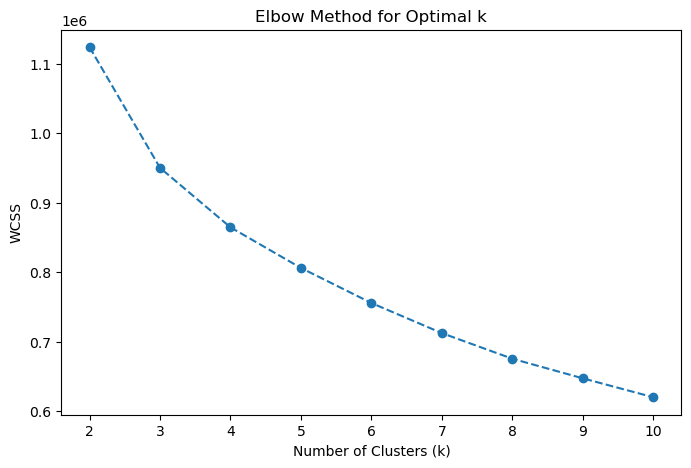

In [5]:
# Compute WCSS (Within-Cluster Sum of Squares) for different k values
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='dashed')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


In [6]:
# Choose optimal k (based on elbow method)
optimal_k = 5  # Adjust based on the elbow plot

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = kmeans.fit_predict(df_scaled)

# Compute silhouette score
sil_score = silhouette_score(df_scaled[features], df_scaled["Cluster"])
print(f"Silhouette Score for k={optimal_k}: {sil_score:.4f}")

# Add cluster labels to the original dataframe
df["Customer_Segment"] = df_scaled["Cluster"]

# Display sample data with assigned clusters
df.head()


Silhouette Score for k=5: 0.1470


,Campaign_ID,Company,Campaign_Type,Target_Audience,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Duration_Days,Engagement_Ratio,CPC,CTR,Year-Month
0,1,Innovate Industries,Email,Men 18-24,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,0,2021-01-01,30,0.263267,31.964427,0.263267,2021-01
1,2,NexGen Systems,Email,Women 35-44,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,4,2021-01-02,60,0.015419,99.706897,0.015419,2021-01
2,3,Alpha Innovations,Influencer,Men 25-34,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,3,2021-01-03,30,0.075864,17.465753,0.075864,2021-01
3,4,DataTech Solutions,Display,All Ages,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,4,2021-01-04,60,0.119231,58.635945,0.119231,2021-01
4,5,NexGen Systems,Email,Men 25-34,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,3,2021-01-05,15,0.090217,43.408971,0.090217,2021-01


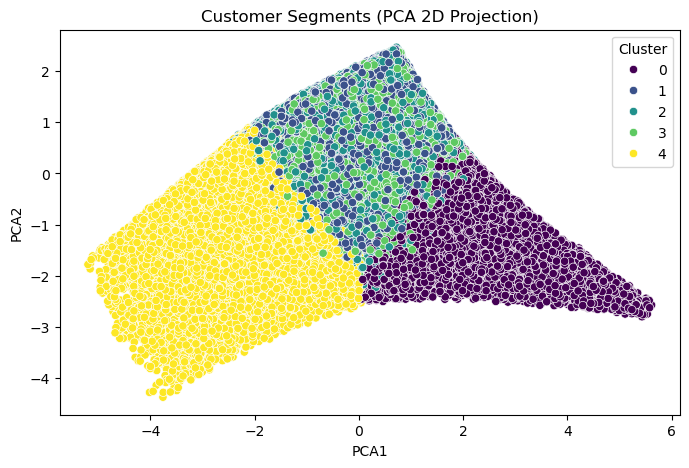

In [7]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled[features])

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PCA1", "PCA2"])
df_pca["Cluster"] = df_scaled["Cluster"]

# Plot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df_pca, palette="viridis")
plt.title("Customer Segments (PCA 2D Projection)")
plt.show()


In [8]:
# Calculate average metrics per segment
cluster_summary = df.groupby("Customer_Segment")[features].mean()

# Display results
print(cluster_summary)

                  Conversion_Rate       ROI      Clicks  Impressions  \
Customer_Segment                                                       
0                        0.080072  4.935314  739.194509  2111.738619   
1                        0.080626  3.133750  604.403509  6414.251398   
2                        0.079736  6.151985  605.315964  6349.861053   
3                        0.079358  6.189633  601.810986  6339.482110   
4                        0.080482  4.958181  197.134416  5323.285587   

                  Engagement_Score        CPC       CTR  
Customer_Segment                                         
0                         5.461776  18.133199  0.385837  
1                         5.437470  22.472030  0.105576  
2                         8.256861  22.554900  0.107428  
3                         2.759239  22.761014  0.107292  
4                         5.533321  77.200348  0.051881  


In [9]:

# Define paths
cleaned_file_path = r"C:\Users\tanzi\Personal Projects\Marketing-Campaign-Performance-Analysis\Marketing-Campaign-Performance-Analysis\data\customer_segments.csv"
zip_file_path = r"C:\Users\tanzi\Personal Projects\Marketing-Campaign-Performance-Analysis\Marketing-Campaign-Performance-Analysis\data\customer_segments.zip"

# Save the cleaned dataset
df.to_csv(cleaned_file_path, index=False)

# Zip the cleaned dataset with the correct CSV name
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(cleaned_file_path, arcname="customer_segments.csv")  # ✅ Corrected

# Remove the original cleaned CSV file (optional, to save space)
os.remove(cleaned_file_path)